## 3..Modeling and Evaluation

In [19]:
# imports we need 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# load the dataset
df=pd.read_excel('../data/Maths.xlsx')

# encoding
df_model = df.copy()
label_cols = ['sex', 'internet', 'schoolsup', 'famsup']
for col in label_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# select features and targets
features = ['sex','internet','age','studytime','freetime','Dalc','Walc', 'failures', 'absences', 'G1', 'G2']
X = df_model[features]
Y = df_model['G3']

# split into train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# train model
model = LinearRegression()
model.fit(X_train, Y_train)

# predict
Y_pred = model.predict(X_test)

# Evaluation
print('R^2 score:', r2_score(Y_test,Y_pred))
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:', rmse)


R^2 score: 0.8572333311791873
RMSE: 1.6959335760693264


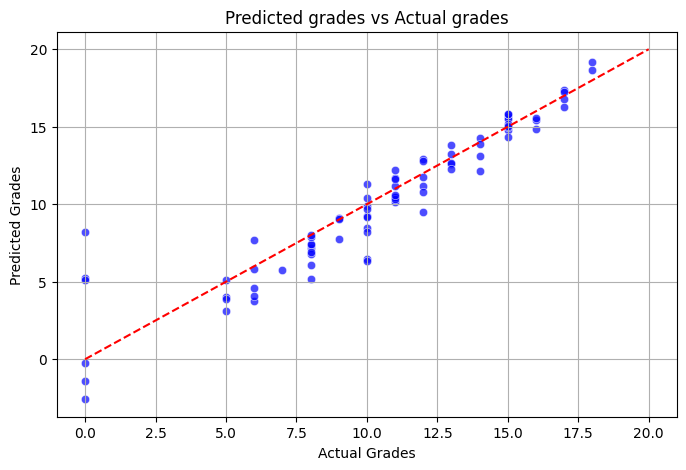

In [9]:
# Predictions vs Actual grade
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_test,y=Y_pred,alpha=0.7,color='blue')
plt.plot([0, 20], [0, 20], '--r')
plt.title('Predicted grades vs Actual grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.grid(True)
plt.show()

### Model Performance Summary

The model demonstrates a strong ability to predict final grades:

$R^2$ Score: 0.86  
Indicates that  about 86% of the variance in final grades is explained by the model.
RMSE: 1.70  
On average, the predicted grades are within about 1.7 points of the actual grades.

The scatter plot shows that most predictions lie close to the ideal (dashed red) line. This indicates that our model generalizes well and makes consistent predictions.

The model could be useful for early prediction of struggling students.  
Further improvement could involve more features (like behavior, engagement, etc.).




In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train it on the same features
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_r2 = r2_score(Y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_preds))

print(f"Random Forest R²: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")


Random Forest R²: 0.8755
Random Forest RMSE: 1.58


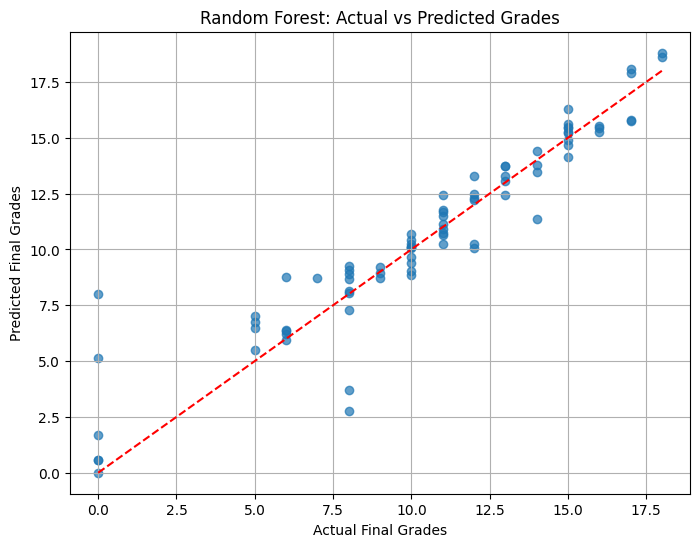

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_preds, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Final Grades")
plt.ylabel("Predicted Final Grades")
plt.title("Random Forest: Actual vs Predicted Grades")
plt.grid(True)
plt.show()

# ###  Model Comparison

| Model              | R² Score | RMSE  |
|-------------------|----------|-------|
| Linear Regression | 0.86    | 1.7  |
| Random Forest     | 0.88    | 1.6  |

No big difference between the models used.


# 4..Final Conclusions

## Final Summary
In this project, we analyzed student performance data to predict final grades.
- Used features like study time, absences, and prior grades.
- Built and evaluated multiple models.
- The model captures most of the variance in final grades with a low prediction error.
- The model can potentially help educators identify at-risk students early based on available data.